In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.7 MB/s 


In [5]:
import pandas as pd
from rdkit import Chem

In [8]:
df = pd.read_csv ('/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/glass_transition.csv')
df

,Amorphous Polymer,Tg_C,CasNo,smiles,molecular weight,Measuremt method,cis/trns
0,Poly(chlorotrifluoroethylene),87,9002-83-9,FC(F)=C(F)Cl,FC(=C(F)F)Cl,NaN,NaN
1,"Poly(vinyl chloride), PVC",83,9002-86-2,ClC=C,NaN,NaN,NaN
2,"Poly(vinyl fluoride), PVF",52,24981-14-4,CCF,NaN,NaN,NaN
3,"Poly(vinylidene chloride), PVDC",-17,9002-85-1,ClC(Cl)=C,NaN,NaN,NaN
4,"Poly(vinylidene fluoride), PVDF",-34,24937-79-9,FC(F)=C,NaN,NaN,NaN
...,...,...,...,...,...,...,...
217,Poly(vinyl methyl ketone),28,67-64-1,NaN,NaN,NaN,NaN
218,Poly(butyl vinyl thioether),-20,0,NaN,NaN,NaN,NaN
219,Poly(ethyl vinyl thioether),-7,96-33-3,NaN,NaN,NaN,NaN
220,Poly(methyl vinyl thioether),-1,96-33-3,NaN,NaN,NaN,NaN


## Find chemsmiles 

In [9]:
df['smile_1'] = df['Amorphous Polymer'].str.strip('Poly()')
df

,Amorphous Polymer,Tg_C,CasNo,smiles,molecular weight,Measuremt method,cis/trns,smile_1
0,Poly(chlorotrifluoroethylene),87,9002-83-9,FC(F)=C(F)Cl,FC(=C(F)F)Cl,NaN,NaN,chlorotrifluoroethylene
1,"Poly(vinyl chloride), PVC",83,9002-86-2,ClC=C,NaN,NaN,NaN,"vinyl chloride), PVC"
2,"Poly(vinyl fluoride), PVF",52,24981-14-4,CCF,NaN,NaN,NaN,"vinyl fluoride), PVF"
3,"Poly(vinylidene chloride), PVDC",-17,9002-85-1,ClC(Cl)=C,NaN,NaN,NaN,"vinylidene chloride), PVDC"
4,"Poly(vinylidene fluoride), PVDF",-34,24937-79-9,FC(F)=C,NaN,NaN,NaN,"vinylidene fluoride), PVDF"
...,...,...,...,...,...,...,...,...
217,Poly(vinyl methyl ketone),28,67-64-1,NaN,NaN,NaN,NaN,vinyl methyl ketone
218,Poly(butyl vinyl thioether),-20,0,NaN,NaN,NaN,NaN,butyl vinyl thioether
219,Poly(ethyl vinyl thioether),-7,96-33-3,NaN,NaN,NaN,NaN,ethyl vinyl thioether
220,Poly(methyl vinyl thioether),-1,96-33-3,NaN,NaN,NaN,NaN,methyl vinyl thioether


In [ ]:
df.to_csv('glass_transition2.csv', index=False)

In [16]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

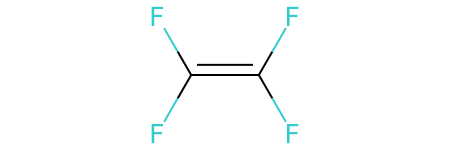

In [17]:
mol = Chem.MolFromSmiles('FC(F)=C(F)F')
mol

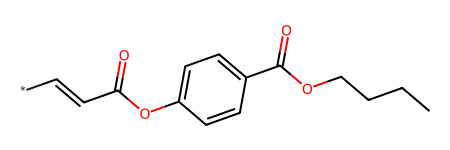

In [15]:
mol = Chem.MolFromSmiles('*C=CC(=O)Oc1ccc(C(=O)OCCCC)cc1')
mol

In [21]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=d90f2594235e3191be3e1de38297b04f15561fdf7732828de00c5c191d442895
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [18]:
polymers = df['Amorphous Polymer']
polymers

0        Poly(chlorotrifluoroethylene)
1            Poly(vinyl chloride), PVC
2            Poly(vinyl fluoride), PVF
3      Poly(vinylidene chloride), PVDC
4      Poly(vinylidene fluoride), PVDF
                    ...               
217          Poly(vinyl methyl ketone)
218        Poly(butyl vinyl thioether)
219        Poly(ethyl vinyl thioether)
220       Poly(methyl vinyl thioether)
221         Poly(vinyl phenyl sulfide)
Name: Amorphous Polymer, Length: 222, dtype: object

In [24]:
polymers1 = polymers[0:10]
polymers1

0      Poly(chlorotrifluoroethylene)
1          Poly(vinyl chloride), PVC
2          Poly(vinyl fluoride), PVF
3    Poly(vinylidene chloride), PVDC
4    Poly(vinylidene fluoride), PVDF
5                       Teflon, PTFE
6          Polychloroprene, Neoprene
7                   Poly(acrylamide)
8       Poly(N,N-dimethylacrylamide)
9        Poly(2-cyanobutyl acrylate)
Name: Amorphous Polymer, dtype: object

In [25]:
import wikipedia
polymers_cas = []

In [26]:
for polymer in polymers1:
    try:
        url = wikipedia.page(polymer).url
        html = pd.read_html(url, header = 0)
        df3 = html[0]
        df4 = df3.fillna('0')
        df4.columns =['Name', 'values']
        df5 = df4.loc[df4.Name == 'CAS Number']
        print(df5.values[0][1])
        polymers_cas.append(df5.values[0][1])
    except:
        polymers_cas.append('0')
        print('0')

9002-83-9
0
0
0
0
0
9010-98-4
9003-05-8
0
0
